In [4]:
# Importing Libraries
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\Poojan Mahajan\Documents\LP\Analyse-AB-test-results-master\x_train.csv")
df.head()

,last_scraped,description,neighborhood_overview,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,...,bedroomsnan,bedsnan,review_scores_ratingnan,review_scores_accuracynan,review_scores_cleanlinessnan,review_scores_checkinnan,review_scores_communicationnan,review_scores_locationnan,review_scores_valuenan,reviews_per_monthnan
0,1.0,1.0,0.0,0.000363,1.0,1.0,1.0,0.666667,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.001029,1.0,1.0,1.0,0.666667,0.0,1.00,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,1.0,1.0,0.0,0.000363,1.0,1.0,1.0,0.666667,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.001762,1.0,1.0,1.0,0.500000,0.0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.001789,1.0,1.0,1.0,0.500000,0.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Exploring the dataset
df

,last_scraped,description,neighborhood_overview,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,...,bedroomsnan,bedsnan,review_scores_ratingnan,review_scores_accuracynan,review_scores_cleanlinessnan,review_scores_checkinnan,review_scores_communicationnan,review_scores_locationnan,review_scores_valuenan,reviews_per_monthnan
0,1.0,1.0,0.0,0.000363,1.0,1.0,1.0,0.666667,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.001029,1.0,1.0,1.0,0.666667,0.0,1.00,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,1.0,1.0,0.0,0.000363,1.0,1.0,1.0,0.666667,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.001762,1.0,1.0,1.0,0.500000,0.0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.001789,1.0,1.0,1.0,0.500000,0.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7735,1.0,1.0,1.0,0.862421,1.0,1.0,1.0,0.666667,1.0,1.00,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7736,1.0,1.0,1.0,0.169814,1.0,1.0,1.0,0.666667,1.0,0.25,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7737,1.0,0.0,1.0,0.169814,1.0,1.0,1.0,0.666667,1.0,0.25,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7738,1.0,1.0,1.0,0.067021,1.0,1.0,1.0,0.833333,0.0,1.00,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
df.describe()

,last_scraped,description,neighborhood_overview,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,...,bedroomsnan,bedsnan,review_scores_ratingnan,review_scores_accuracynan,review_scores_cleanlinessnan,review_scores_checkinnan,review_scores_communicationnan,review_scores_locationnan,review_scores_valuenan,reviews_per_monthnan
count,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,...,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000
mean,0.559238,0.968088,0.444574,0.261759,0.959302,0.938986,0.957106,0.647717,0.531912,0.719154,...,0.038630,0.009432,0.245090,0.266925,0.266796,0.267700,0.266925,0.267700,0.267959,0.245090
std,0.496478,0.175778,0.496951,0.250184,0.197602,0.222680,0.202631,0.230373,0.499013,0.405029,...,0.192725,0.096663,0.430169,0.442381,0.442313,0.442789,0.442381,0.442789,0.442925,0.430169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.062628,1.000000,1.000000,1.000000,0.500000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.167473,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.422727,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.dtypes

last_scraped                      float64
description                       float64
neighborhood_overview             float64
host_id                           float64
host_url                          float64
                                   ...   
review_scores_checkinnan          float64
review_scores_communicationnan    float64
review_scores_locationnan         float64
review_scores_valuenan            float64
reviews_per_monthnan              float64
Length: 72, dtype: object

In [9]:
# Split-out validation df
array = df.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [10]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.955103 (0.003678)
LDA: 0.937661 (0.003703)
KNN: 0.999515 (0.001454)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 0.957849 (0.000466)


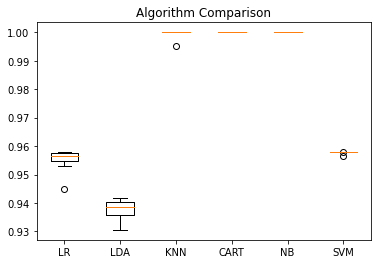

In [11]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [12]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [14]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9651162790697675
[[   0   54]
 [   0 1494]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        54
         1.0       0.97      1.00      0.98      1494

    accuracy                           0.97      1548
   macro avg       0.48      0.50      0.49      1548
weighted avg       0.93      0.97      0.95      1548



C:\Users\Poojan Mahajan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Poojan Mahajan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Poojan Mahajan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
